## AdaBoosting, Gradientboosting, XGBoosting Regressor

### Import

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

### Data Info

In [112]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [113]:
df.shape

(301, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [115]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


### Visualization

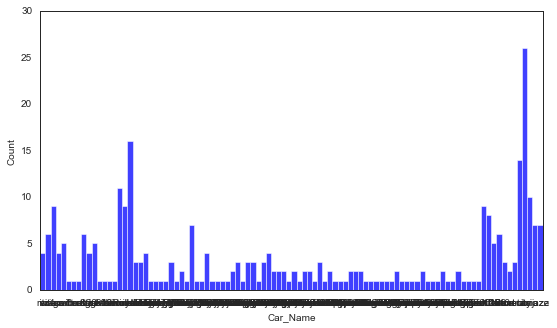

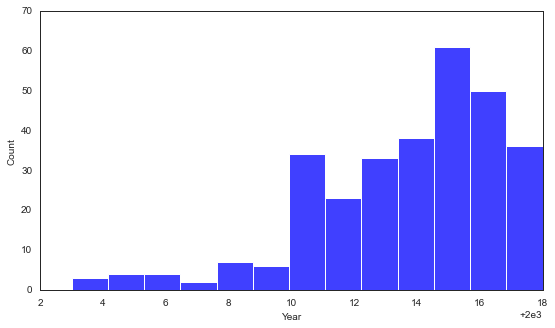

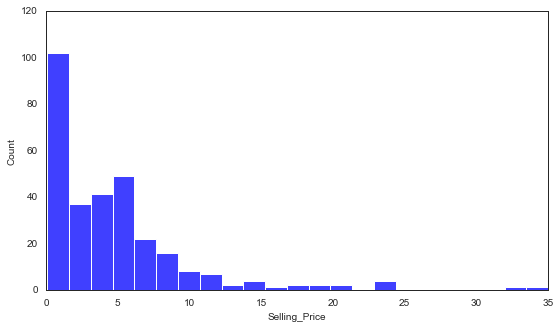

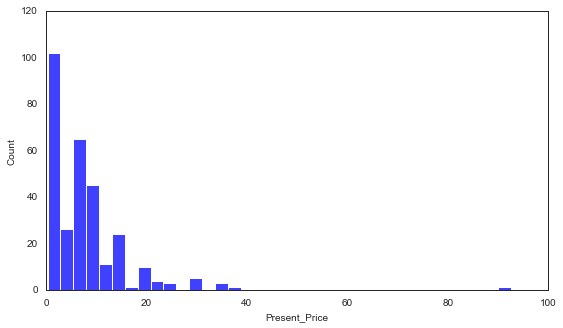

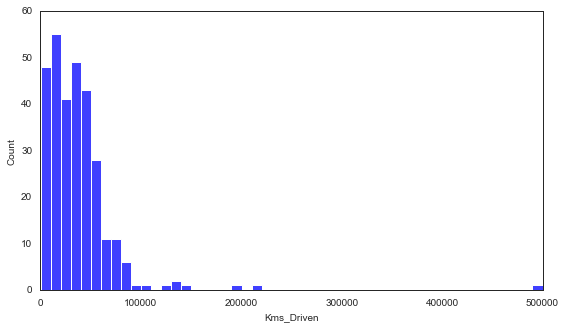

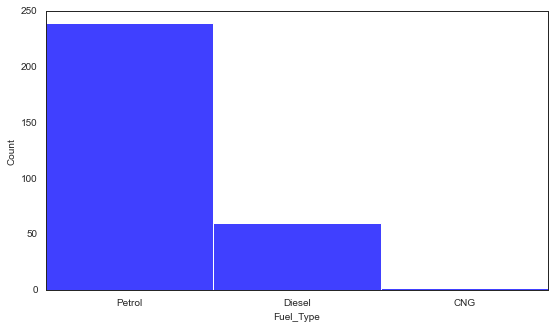

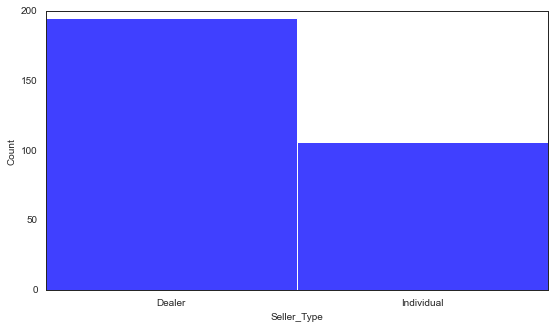

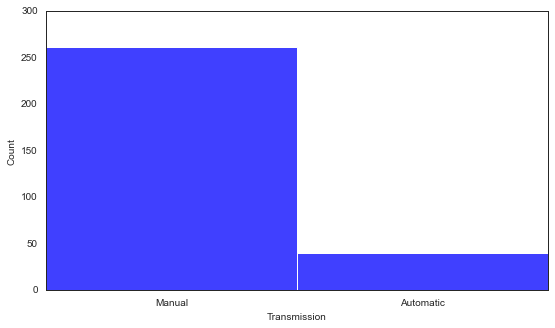

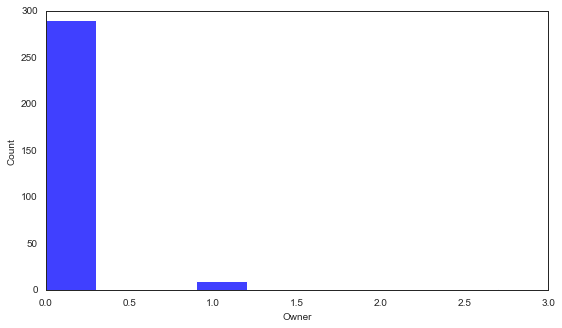

In [117]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

### Correlation

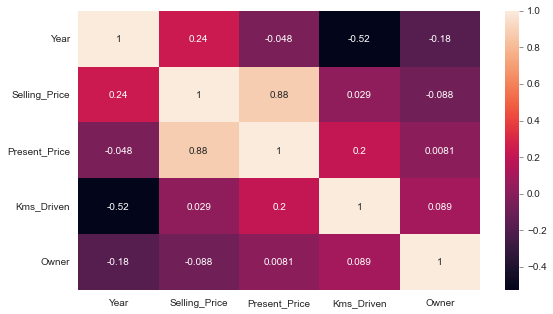

In [118]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [119]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


### Dropping

In [120]:
df["vehicle_age"] = 2021 - df.Year

In [121]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [122]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [123]:
df=pd.get_dummies(df, drop_first=True)

In [124]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.350,5.590,27000,0,7,0,1,0,1
1,4.750,9.540,43000,0,8,1,0,0,1
2,7.250,9.850,6900,0,4,0,1,0,1
3,2.850,4.150,5200,0,10,0,1,0,1
4,4.600,6.870,42450,0,7,1,0,0,1


### Train test split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [128]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


### Metrics Def

In [129]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [130]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
                            "mae" : mean_absolute_error(y_train, y_train_pred),
                            "mse" : mean_squared_error(y_train, y_train_pred),                          
                            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
            
              "test_set": {"R2" : r2_score(y_test, y_pred),
                           "mae" : mean_absolute_error(y_test, y_pred),
                           "mse" : mean_squared_error(y_test, y_pred),
                           "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### AdaBoostRegressor

In [131]:
from sklearn.ensemble import AdaBoostRegressor

In [132]:
model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [133]:
model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [134]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [135]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.974,0.957
mae,0.656,0.817
mse,0.671,1.166
rmse,0.819,1.080


### AdaBoostRegressor CV

In [136]:
from sklearn.model_selection import cross_validate, cross_val_score

In [137]:
model = AdaBoostRegressor(n_estimators=50, random_state=101)

In [138]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.842
test_neg_mean_absolute_error       -1.086
test_neg_mean_squared_error        -4.733
test_neg_root_mean_squared_error   -1.868
dtype: float64

In [139]:
model = AdaBoostRegressor(n_estimators=3, random_state=101)

In [140]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [141]:
from sklearn.tree import plot_tree

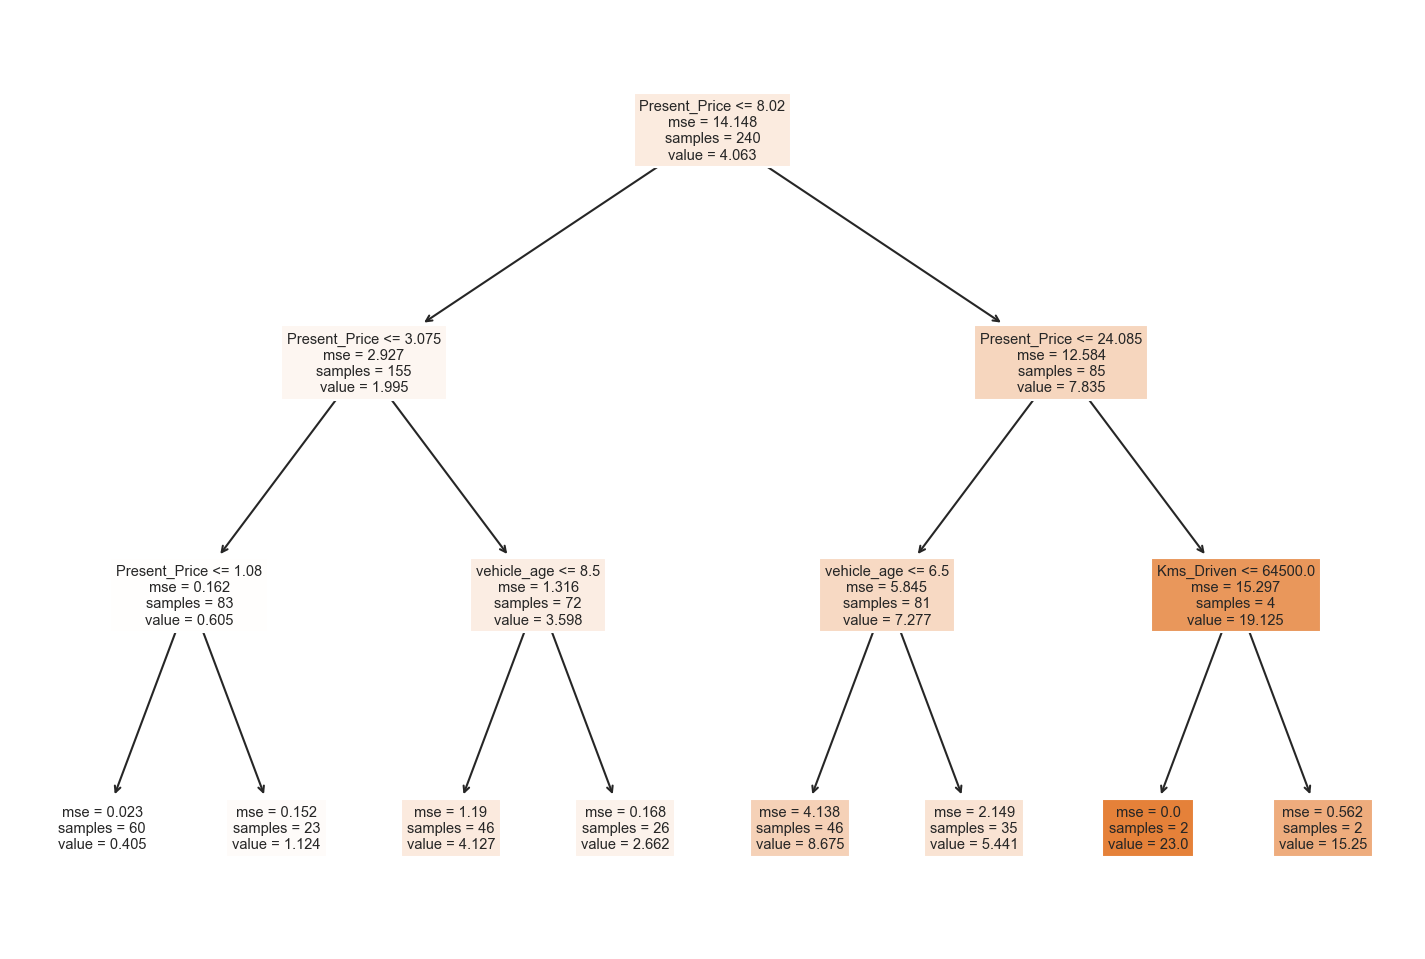

In [142]:
features = list(X.columns)
#targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns);

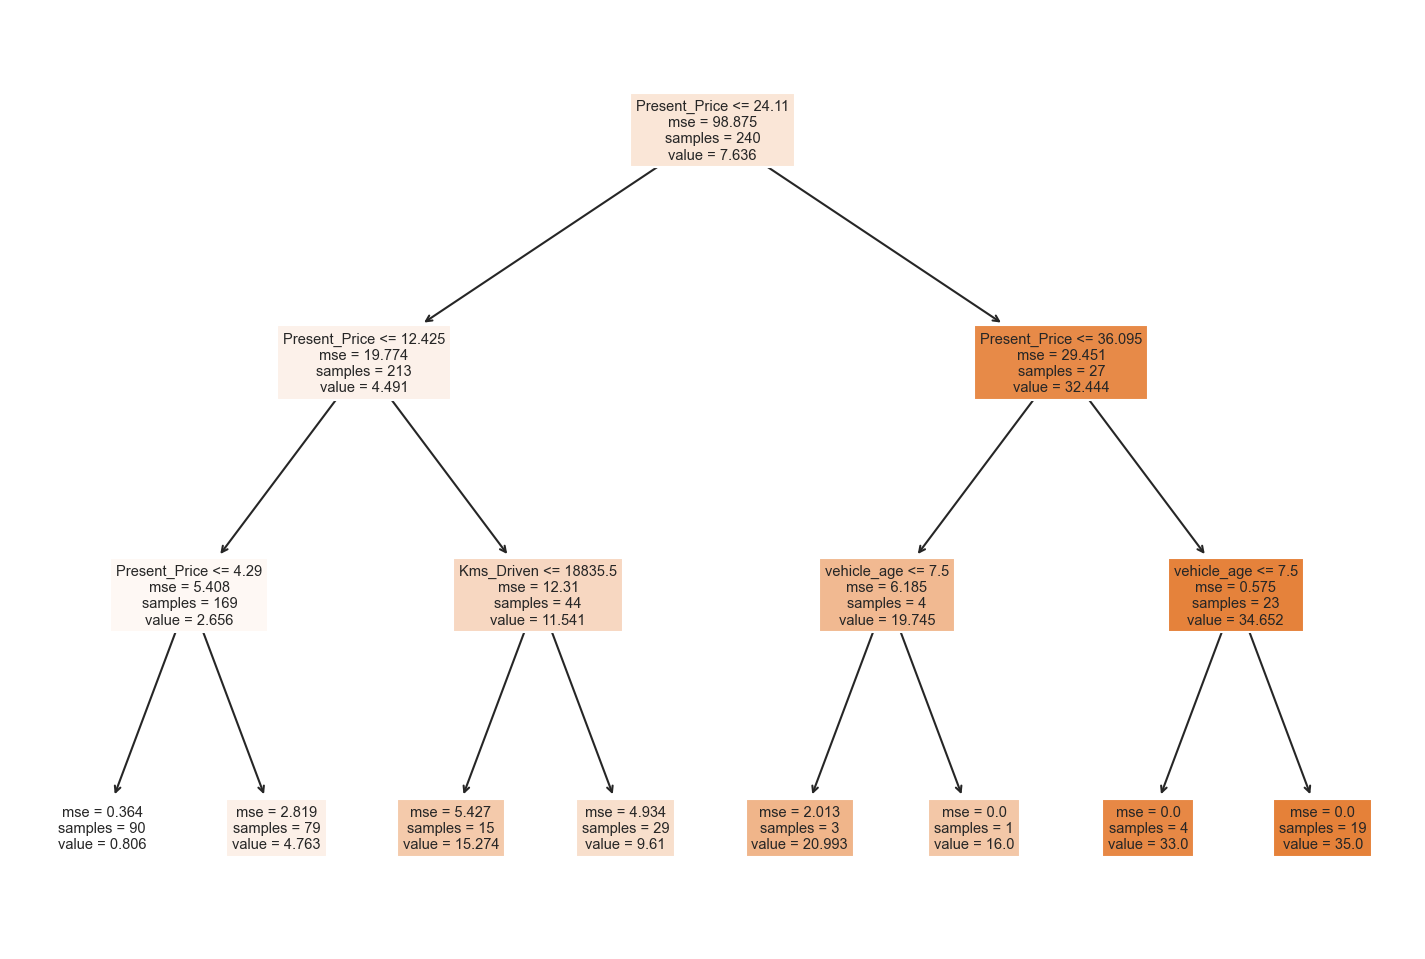

In [143]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns);

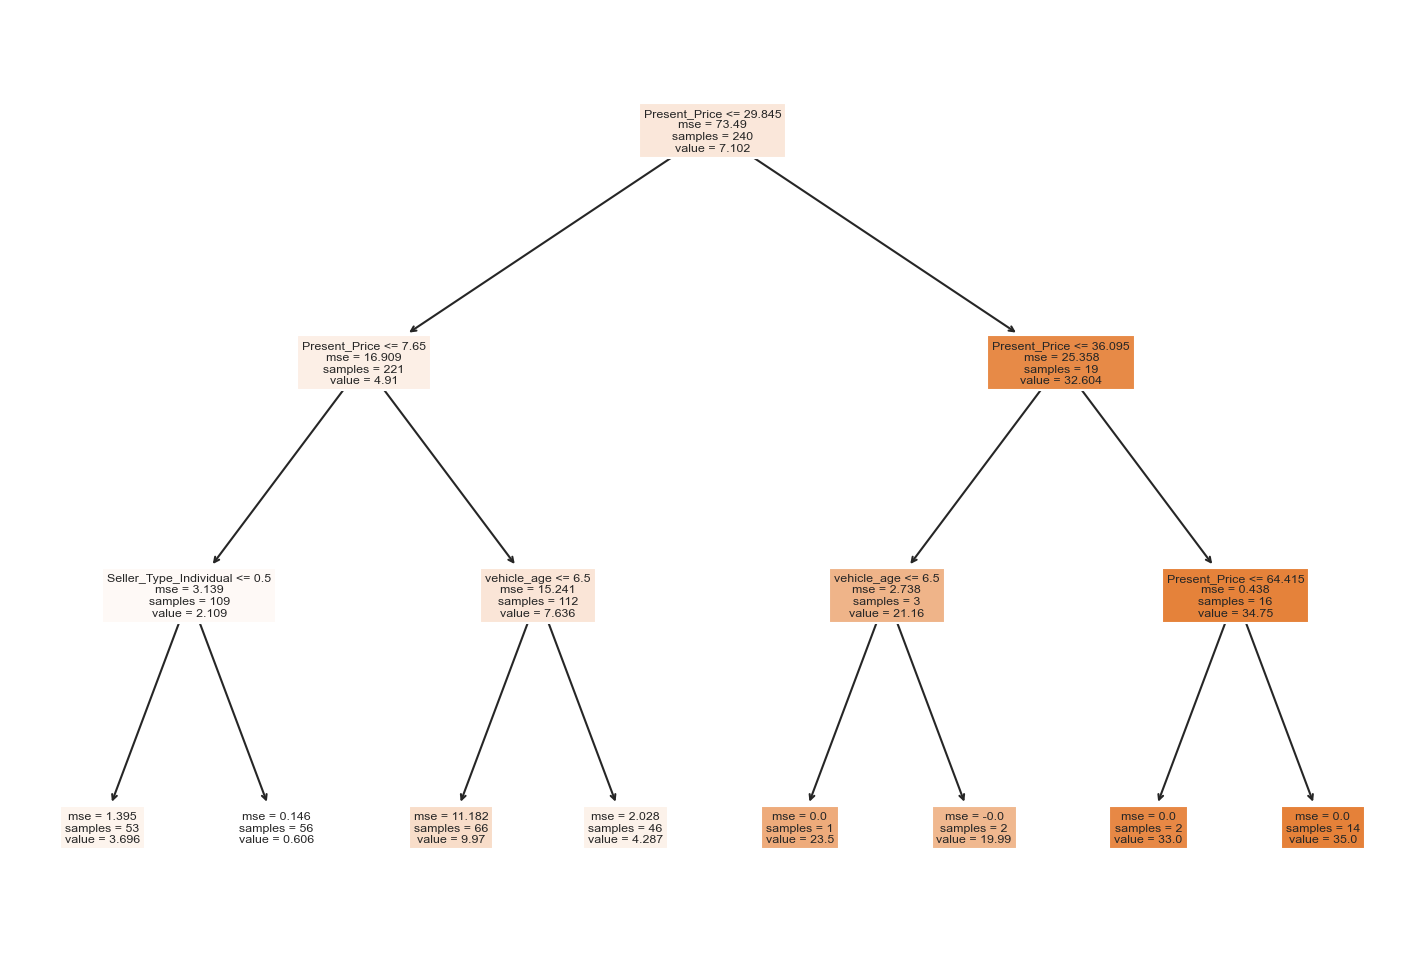

In [144]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns);

In [145]:
y_pred

array([ 5.44085714,  5.44085714,  4.12717391,  4.12717391,  4.12717391,
        5.44085714,  5.44085714,  0.60589286, 16.        ,  4.12717391,
        4.76253165,  8.67478261,  4.12717391,  5.44085714,  0.60589286,
        4.12717391,  5.44085714,  0.60589286,  5.44085714,  0.60589286,
        5.44085714, 23.        , 19.99      ,  0.80633333,  3.69622642,
        4.12717391,  4.76253165,  8.67478261,  4.76253165,  5.44085714,
        4.12717391,  9.61034483,  4.12717391,  0.60589286,  0.60589286,
        4.76253165,  8.67478261,  4.12717391,  0.80633333,  0.80633333,
        0.60589286,  4.12717391,  9.97030303,  0.60589286,  0.80633333,
        4.12717391,  0.60589286,  8.67478261,  4.12717391,  4.76253165,
        4.12717391, 20.99333333,  4.28652174,  0.80633333,  0.60589286,
        0.60589286,  3.69622642,  0.60589286,  0.60589286,  0.60589286,
        0.60589286])

In [146]:
np.array(y_test)

array([ 9.25,  9.65,  3.65,  6.  ,  2.9 ,  8.25,  6.25,  0.6 , 14.9 ,
        5.5 ,  5.5 ,  6.5 ,  3.45,  3.49,  0.45,  3.5 ,  7.05,  0.35,
        6.95,  0.4 ,  3.8 , 23.  , 18.75,  1.  ,  1.95,  4.5 ,  4.5 ,
        9.1 ,  5.8 ,  4.35,  5.25,  9.7 ,  5.4 ,  0.2 ,  0.38,  6.15,
        7.75,  4.9 ,  1.05,  1.35,  0.75,  4.8 , 19.75,  0.17,  1.11,
        4.75,  0.2 ,  8.35,  2.9 ,  4.5 ,  5.15, 20.75,  2.25,  1.1 ,
        0.35,  0.15,  3.  ,  0.3 ,  0.2 ,  0.75,  0.45])

In [147]:
y_test

67     9.250
99     9.650
266    3.650
222    6.000
24     2.900
282    8.250
279    6.250
138    0.600
50    14.900
234    5.500
43     5.500
265    6.500
88     3.450
84     3.490
163    0.450
220    3.500
98     7.050
176    0.350
60     6.950
171    0.400
90     3.800
93    23.000
62    18.750
123    1.000
42     1.950
56     4.500
61     4.500
235    9.100
48     5.800
68     4.350
226    5.250
277    9.700
252    5.400
193    0.200
174    0.380
230    6.150
49     7.750
21     4.900
119    1.050
106    1.350
132    0.750
268    4.800
66    19.750
196    0.170
115    1.110
241    4.750
191    0.200
267    8.350
216    2.900
219    4.500
207    5.150
96    20.750
39     2.250
117    1.100
178    0.350
198    0.150
25     3.000
181    0.300
194    0.200
127    0.750
161    0.450
Name: Selling_Price, dtype: float64

In [148]:
X.loc[67]

Present_Price               20.450
Kms_Driven               59000.000
Owner                        0.000
vehicle_age                 11.000
Fuel_Type_Diesel             1.000
Fuel_Type_Petrol             0.000
Seller_Type_Individual       0.000
Transmission_Manual          1.000
Name: 67, dtype: float64

### AdaBoostRegressor GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
model = AdaBoostRegressor(random_state=101)

In [151]:
param_grid = {"n_estimators":[50, 100, 200, 300],
              "learning_rate":[0.1, 0.8, 1]}

In [152]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [153]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.8, 1],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [154]:
grid_model.best_estimator_

AdaBoostRegressor(learning_rate=0.8, n_estimators=200, random_state=101)

In [155]:
grid_model.best_index_

6

In [156]:
pd.DataFrame(grid_model.cv_results_).loc[6]

mean_fit_time                                                0.381
std_fit_time                                                 0.131
mean_score_time                                              0.023
std_score_time                                               0.007
param_learning_rate                                          0.800
param_n_estimators                                             200
params                 {'learning_rate': 0.8, 'n_estimators': 200}
split0_test_score                                           -1.223
split1_test_score                                           -0.997
split2_test_score                                           -1.673
split3_test_score                                           -1.563
split4_test_score                                           -3.388
split5_test_score                                           -0.971
split6_test_score                                           -2.694
split7_test_score                                           -0

In [157]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [158]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.966,0.939
mae,0.802,1.013
mse,0.860,1.645
rmse,0.928,1.283


### AdaBoostRegressor CV With Best Estimators

In [159]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.842
test_neg_mean_absolute_error       -1.086
test_neg_mean_squared_error        -4.733
test_neg_root_mean_squared_error   -1.868
dtype: float64

### AdaBoostRegressor Feature importance

In [160]:
model = AdaBoostRegressor(n_estimators=200, learning_rate=0.8, random_state=101)

In [161]:
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.8, n_estimators=200, random_state=101)

In [162]:
model.feature_importances_

array([0.75992016, 0.05040179, 0.00341982, 0.11132163, 0.04848095,
       0.01163938, 0.01039335, 0.00442292])

In [163]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
imp_feats

,Importance
Present_Price,0.760
Kms_Driven,0.050
Owner,0.003
vehicle_age,0.111
Fuel_Type_Diesel,0.048
Fuel_Type_Petrol,0.012
Seller_Type_Individual,0.010
Transmission_Manual,0.004


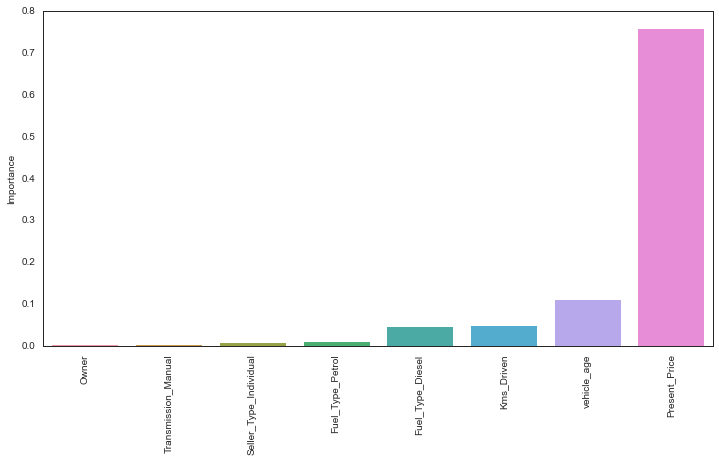

In [164]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);

### GradientBoostingRegressor

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

In [166]:
model = GradientBoostingRegressor(random_state=101)

In [167]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

In [168]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [169]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.997,0.962
mae,0.219,0.626
mse,0.089,1.027
rmse,0.298,1.013


In [170]:
model = GradientBoostingRegressor(random_state=101)

In [171]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.884
test_neg_mean_absolute_error       -0.757
test_neg_mean_squared_error        -3.575
test_neg_root_mean_squared_error   -1.591
dtype: float64

### GradientBoostingRegressor GridSearchCV

In [172]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              'max_depth':[2,3]}

In [173]:
model = GradientBoostingRegressor(random_state=101)

In [174]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [175]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [176]:
grid_model.best_estimator_

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=1)

In [177]:
grid_model.best_index_

119

In [178]:
pd.DataFrame(grid_model.cv_results_).loc[119]

mean_fit_time                                                      0.164
std_fit_time                                                       0.006
mean_score_time                                                    0.004
std_score_time                                                     0.001
param_learning_rate                                                0.100
param_max_depth                                                        2
param_max_features                                                     4
param_n_estimators                                                   300
param_subsample                                                        1
params                 {'learning_rate': 0.1, 'max_depth': 2, 'max_fe...
split0_test_score                                                 -0.749
split1_test_score                                                 -0.833
split2_test_score                                                 -0.792
split3_test_score                                  

In [179]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [180]:
pd.options.display.float_format = '{:.3f}'.format
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.996,0.951
mae,0.242,0.677
mse,0.112,1.320
rmse,0.334,1.149


### GradientBoostingRegressor CV With Best Estimator

In [181]:
model = GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300, random_state=101)

In [182]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores).iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.951,-0.586,-0.562,-0.749
1,0.937,-0.602,-0.694,-0.833
2,0.981,-0.545,-0.627,-0.792
3,0.935,-0.519,-0.809,-0.900
4,0.812,-1.083,-6.328,-2.516
5,0.973,-0.462,-0.388,-0.623
6,0.939,-0.886,-3.582,-1.893
7,0.922,-0.521,-0.657,-0.811
8,0.942,-0.510,-0.704,-0.839
9,0.733,-1.397,-13.251,-3.640


In [183]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.913
test_neg_mean_absolute_error       -0.711
test_neg_mean_squared_error        -2.760
test_neg_root_mean_squared_error   -1.359
dtype: float64

### GradientBoostingRegressor Feature Importance

In [184]:
model = GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300, random_state=101)

In [185]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101)

In [186]:
model.feature_importances_

array([7.11023743e-01, 4.12736086e-02, 1.11034192e-04, 3.90727849e-02,
       7.49183458e-02, 2.11072187e-02, 1.03406640e-01, 9.08662445e-03])

In [187]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
imp_feats

,Importance
Present_Price,0.711
Kms_Driven,0.041
Owner,0.000
vehicle_age,0.039
Fuel_Type_Diesel,0.075
Fuel_Type_Petrol,0.021
Seller_Type_Individual,0.103
Transmission_Manual,0.009


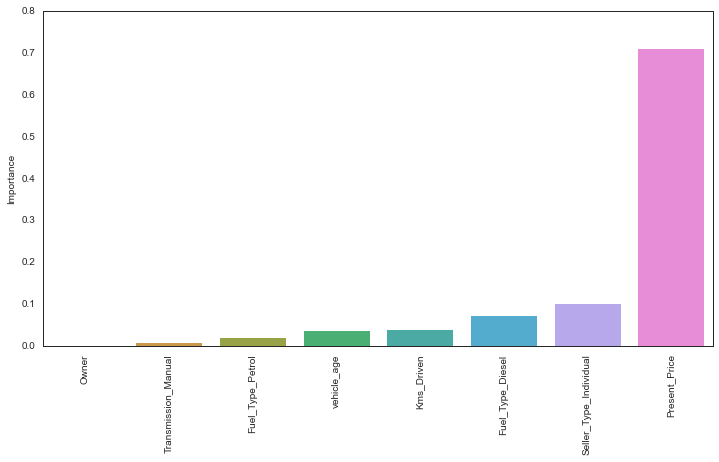

In [188]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);

### XGBRegressor

In [189]:
#!pip install xgboost

In [190]:
from xgboost import XGBRegressor

In [191]:
model = XGBRegressor(silent=True, random_state=101)

In [192]:
model.fit(X_train, y_train)

[15:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [193]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.000,0.961
mae,0.007,0.574
mse,0.000,1.041
rmse,0.009,1.020


### XGBRegressor CV

In [194]:
model = XGBRegressor(silent=True, random_state=101)

In [195]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores).iloc[:, 2:].mean()

[15:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

test_r2                             0.902
test_neg_mean_absolute_error       -0.736
test_neg_mean_squared_error        -2.762
test_neg_root_mean_squared_error   -1.423
dtype: float64

### XGBRegressor GridSearchCV

In [196]:
model = XGBRegressor(silent=True, random_state=101)

In [197]:
param_grid = {"n_estimators":[100, 300,500],
              "max_depth":[3,5,6,7],
              "learning_rate": [0.05, 0.1, 0.2],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [198]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [199]:
grid_model.fit(X_train, y_train)

[15:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [200]:
grid_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [201]:
grid_model.best_index_

126

In [202]:
pd.DataFrame(grid_model.cv_results_).loc[126]

mean_fit_time                                                         0.183
std_fit_time                                                          0.031
mean_score_time                                                       0.007
std_score_time                                                        0.006
param_colsample_bytree                                                    1
param_learning_rate                                                   0.200
param_max_depth                                                           5
param_n_estimators                                                      100
param_subsample                                                       0.500
params                    {'colsample_bytree': 1, 'learning_rate': 0.2, ...
split0_test_score                                                    -0.604
split1_test_score                                                    -0.895
split2_test_score                                                    -0.746
split3_test_

In [203]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.999,0.974
mae,0.085,0.531
mse,0.013,0.710
rmse,0.113,0.843


### XGBRegressor CV With Best Estimator

In [204]:
model = XGBRegressor(silent=True, learning_rate=0.2, max_dept=5, subsample=0.5, random_state=101)

In [205]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores).iloc[:, 2:]

[15:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might n

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.973,-0.390,-0.308,-0.555
1,0.928,-0.656,-0.786,-0.887
2,0.982,-0.495,-0.588,-0.767
3,0.895,-0.602,-1.305,-1.142
4,0.816,-1.095,-6.209,-2.492
5,0.967,-0.444,-0.482,-0.694
6,0.915,-0.978,-5.016,-2.240
7,0.897,-0.605,-0.867,-0.931
8,0.979,-0.282,-0.256,-0.506
9,0.929,-0.773,-3.503,-1.872


In [206]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.928
test_neg_mean_absolute_error       -0.632
test_neg_mean_squared_error        -1.932
test_neg_root_mean_squared_error   -1.209
dtype: float64

### XGBRegressor Feature importance

In [207]:
model = XGBRegressor(silent=True, learning_rate=0.2, max_dept=5, subsample=0.5, random_state=101)

In [208]:
model.fit(X_train, y_train)

[15:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_dept=5, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=101, reg_alpha=0, ...)

In [209]:
model.feature_importances_

array([0.7160261 , 0.02847685, 0.00246644, 0.13137622, 0.09737629,
       0.00190744, 0.00342946, 0.01894121], dtype=float32)

In [210]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
imp_feats

,Importance
Present_Price,0.716
Kms_Driven,0.028
Owner,0.002
vehicle_age,0.131
Fuel_Type_Diesel,0.097
Fuel_Type_Petrol,0.002
Seller_Type_Individual,0.003
Transmission_Manual,0.019


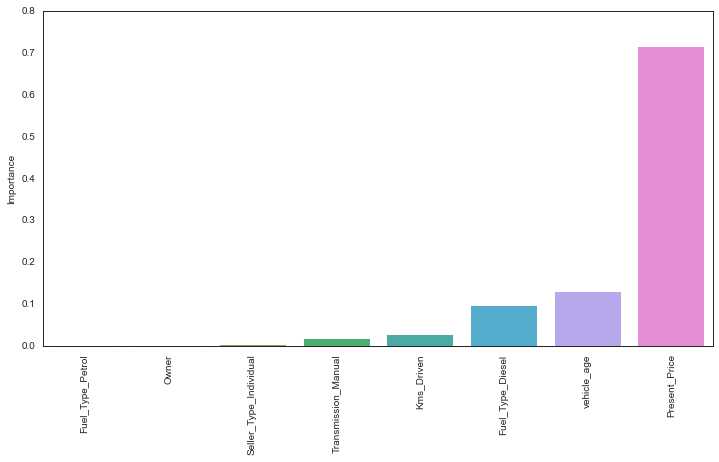

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);

### New Model With 2 Feature & XGBRegressor

In [212]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [213]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.590
1,8,9.540
2,4,9.850
3,10,4.150
4,7,6.870


### XGBRegressor & Train Test Split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [215]:
model = XGBRegressor(silent=True, random_state=101)

In [216]:
model.fit(X_train, y_train)

[15:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, ...)

In [217]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [218]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.997,0.969
mae,0.115,0.632
mse,0.087,0.778
rmse,0.295,0.882


### XGBRegressor CV With Best Estimators

In [219]:
model = XGBRegressor(silent=True, learning_rate=0.2, max_dept=5, subsample=0.5, random_state=101)

In [220]:
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10)
                        
pd.DataFrame(scores).iloc[:, 2:].mean()

[15:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_dept", "silent" } might n

test_r2                             0.864
test_neg_mean_absolute_error       -0.699
test_neg_mean_squared_error        -2.691
test_neg_root_mean_squared_error   -1.387
dtype: float64